# Wykop project
Project of fetching and analysing wykop data.

## Fetching data
Pages in wykop are available under URL's with numbers: https://www.wykop.pl/link/3953283/ This URL will redirect to correct one, containing title: https://www.wykop.pl/link/3953283/to-juz-oficjalne-nasa-wraca-na-ksiezyc/

Shortest sequence of steps require to call URL using https protocol and with "/" at the end.

### Existing resource

In [1]:
import requests

# allow_redirects=False - this is to prevent requests from automaticly following redirections
r = requests.get('https://www.wykop.pl/link/3953283/', allow_redirects=False)
print r.status_code
print r.headers['Location']

301
https://www.wykop.pl/link/3953283/to-juz-oficjalne-nasa-wraca-na-ksiezyc/


### Non existing resource

In [2]:
import requests

# allow_redirects=False - this is to prevent requests from automaticly following redirections
r = requests.get('https://www.wykop.pl/link/3953282/', allow_redirects=False)
print r.status_code

404


### Function fetching wykop pages

In [3]:
def fetch_wykop_page(id):
    """
    Fetch main wykop page by id
    
    Parameters:
    id: page id
    
    Returns:
    Dictionary: {
        id: requested page's id
        exists: boolean - is page exists
        url: full url of page with requested id
        error: error massage if error ocure
        body: text with body of page
    }
    """
    
    r = requests.get('https://www.wykop.pl/link/%d/' % id, allow_redirects=False)
    if r.status_code==404:
        return {
            'id': id, 
            'exists': False, 
            'error': None
        }
    elif r.status_code==301:
        r2 = requests.get(r.headers['Location'], allow_redirects=False)
        if r2.status_code==200:
            return {
                'id': id, 
                'exists': True, 
                'url': r.headers['Location'],
                'error': None,
                'body': r2.text
                   }
        else:
            return {
                'id': id, 
                'exists': True, 
                'url': r.headers['Location'],
                'error': 'error fetching redirected page: %d' % r2.status_code
                   }
    else:
        return {
                'id': id, 
                'exists': False, 
                'error': 'error fetching main page: %d' % r.status_code
                   }

In [4]:
# correct page, contains page body so it's litle messy
# print fetch_wykop_page(3953283)

# non existing page
print fetch_wykop_page(3953282)


{'id': 3953282, 'exists': False, 'error': None}


# Users up and down votes

In [1]:
from pymongo import MongoClient
import pandas as pd

client = MongoClient()
db = client.wykop
pages = db.pages

In [14]:
up_votes_query = [
    {"$unwind": {"path": "$up_voters"}},
    {"$group": {"_id": "$up_voters.user", "up_votes": {"$sum": 1}}},
    {"$project": {"id": "$_id", "up_votes": "$up_votes"}},
]

up_df =  pd.DataFrame(list(pages.aggregate(up_votes_query)))
del up_df['_id']
up_df = up_df.set_index('id')

display(up_df.head())
up_df.describe()

,up_votes
id,
nightlylens,1
emzi,1
bobiow,1
majcel,1
DarasDSX,1


,up_votes
count,17526.000000
mean,4.214082
std,9.680431
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,543.000000


In [15]:
down_votes_query = [
    {"$unwind": {"path": "$down_voters"}},
    {"$group": {"_id": "$down_voters.user", "down_votes": {"$sum": 1}}},
    {"$project": {"id": "$_id", "down_votes": "$down_votes"}},
]

do_df =  pd.DataFrame(list(pages.aggregate(down_votes_query)))
del do_df['_id']
do_df = do_df.set_index('id')

display(do_df.head())
do_df.describe()

,down_votes
id,
jazzu,1
Kai,1
truepeperepe,1
Mr--A-Veed,1
Kiedynek12,1


,down_votes
count,3393.000000
mean,2.457118
std,5.870106
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,228.000000


In [22]:
votes_df = pd.concat([up_df, do_df], axis=1)
votes_df.fillna(0, inplace=True)

display(votes_df)
votes_df.describe()

,up_votes,down_votes
-KyLo-,1.0,1.0
-PPP-,3.0,1.0
-logan-,7.0,0.0
-marcus-,1.0,0.0
0........1,1.0,0.0
00000110-00000110-00000110,1.0,0.0
0007,6.0,4.0
000loki,2.0,0.0
007stuntman,5.0,0.0
011011010110000101111000,1.0,0.0


,up_votes,down_votes
count,18586.000000,18586.000000
mean,3.973744,0.448563
std,9.450980,2.681429
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,543.000000,228.000000


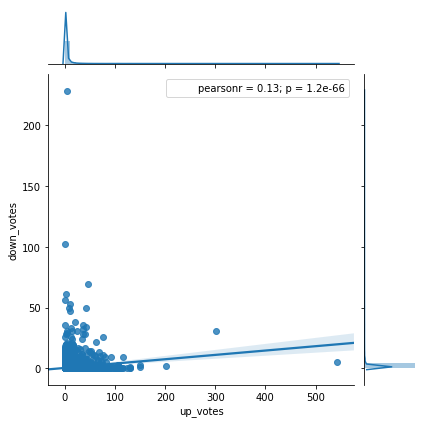

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x = 'up_votes', y = 'down_votes', data=votes_df, kind="reg")
plt.show()

# Users favorite tags

In [16]:
users_tags_query = [
    {"$project": {"k": "$keys", "u": "$up_voters"}},
    {"$unwind": {"path": "$k"}},
    {"$unwind": {"path": "$u"}},
    {"$group": {"_id": {"user": "$u.user", "key": "$k"}, "counter": {"$sum": 1}}},
    {"$group": {"_id": "$_id.user", "keys": {"$push": {"key": "$_id.key", "count": "$counter"}}}},
]

users_tags = pages.aggregate(users_tags_query)
users_tags_array = []
for uts in users_tags:
    u = {"name": uts['_id']}
    
    for t in uts['keys']:
        u[t['key']] = t['count']
        
    users_tags_array.append(u)
    
ut_df =  pd.DataFrame(list(users_tags_array))
ut_df.fillna(0, inplace=True)
ut_df.set_index('name', inplace=True)

display(ut_df.head())
ut_df.describe()

,,europa,125cc,1984,1z10,30plusclub,3mk,4konserwy,4x4,60parsecs,...,zoo,zubr,zwiazki,zwiedzajzwykopem,zwierzaczki,zwierzeta,zwloki,zycie,zycieposmierci,zydzi
name,,,,,,,,,,,,,,,,,,,,,
fnzavrjvrz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
artdeeeker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n3xo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brainondrugs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
krajzega,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,,europa,125cc,1984,1z10,30plusclub,3mk,4konserwy,4x4,60parsecs,...,zoo,zubr,zwiazki,zwiedzajzwykopem,zwierzaczki,zwierzeta,zwloki,zycie,zycieposmierci,zydzi
count,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,...,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000
mean,0.002396,0.026076,0.000171,0.001426,0.000342,0.024136,0.000057,0.329168,0.000456,0.000057,...,0.000628,0.031154,0.037772,0.000399,0.117026,0.081422,0.001141,0.000171,0.000399,0.024649
std,0.050050,0.159365,0.013083,0.037743,0.018500,0.153474,0.007554,0.862800,0.021361,0.007554,...,0.027229,0.173738,0.198280,0.019982,0.417245,0.345074,0.033763,0.013083,0.019982,0.156887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,1.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,9.000000,9.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
tags_occurence_on_pages_query = [
    {"$unwind": {"path": "$keys"}},
    {"$group": {"_id": "$keys", "occurs": {"$sum": 1}}},
    {"$sort": {"occurs": -1}}
]

tspp = list(pages.aggregate(tags_occurence_on_pages_query))
    
for tpp in tspp:
    if tpp['_id'] in ut_df:
        ut_df[tpp['_id']] = ut_df[tpp['_id']].apply(lambda x: x / tpp['occurs'])

display(ut_df.head())
ut_df.describe()


,,europa,125cc,1984,1z10,30plusclub,3mk,4konserwy,4x4,60parsecs,...,zoo,zubr,zwiazki,zwiedzajzwykopem,zwierzaczki,zwierzeta,zwloki,zycie,zycieposmierci,zydzi
name,,,,,,,,,,,,,,,,,,,,,
fnzavrjvrz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
artdeeeker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n3xo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brainondrugs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
krajzega,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,,europa,125cc,1984,1z10,30plusclub,3mk,4konserwy,4x4,60parsecs,...,zoo,zubr,zwiazki,zwiedzajzwykopem,zwierzaczki,zwierzeta,zwloki,zycie,zycieposmierci,zydzi
count,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,...,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000
mean,0.000599,0.026076,0.000171,0.001426,0.000342,0.024136,0.000057,0.007655,0.000456,0.000057,...,0.000314,0.031154,0.007554,0.000399,0.011703,0.004285,0.001141,0.000171,0.000399,0.008216
std,0.012512,0.159365,0.013083,0.037743,0.018500,0.153474,0.007554,0.020065,0.021361,0.007554,...,0.013614,0.173738,0.039656,0.019982,0.041724,0.018162,0.033763,0.013083,0.019982,0.052296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.627907,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.900000,0.473684,1.000000,1.000000,1.000000,1.000000


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

tags_df = pd.DataFrame(tspp)
tags_df['name'] = tags_df['_id']
tags_df = tags_df.drop(['_id'], axis=1)

#display(tags_df[tags_df['occurs']>20])

#tags_df[tags_df['occurs']>20].hist(bins=25)
#plt.show()


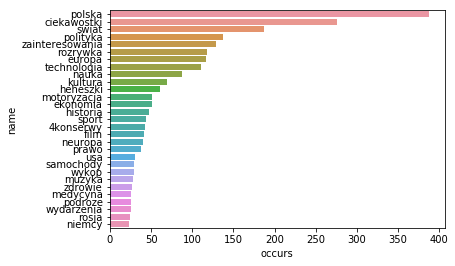

In [59]:
sns.barplot(y='name', x='occurs', data=tags_df[tags_df['occurs']>20])
plt.show()